# NiceCX v1.0 Tutorial

In this tutorial you will learn to use NiceCX, a simple data model that is part of the ndex2 NDEx Client module.
NiceCX facilitates creating and working with networks, including interfaces to NetworkX and Pandas.
This tutorial requires Python 3.6+ and the ndex2 module, see the NDEx Client Tutorial for installation instructions.

### Import Packages Required for this Tutorial

In [2]:
from nicecxModel.NiceCXNetwork import NiceCXNetwork
from nicecxModel.cx.aspects.NodeElement import NodeElement
from nicecxModel.cx.aspects.EdgeElement import EdgeElement
from nicecxModel.cx.aspects.NodeAttributesElement import NodeAttributesElement
from nicecxModel.cx.aspects.EdgeAttributesElement import EdgeAttributesElement
import networkx as nx
import pandas as pd
import os

# Five Ways to Work with NiceCX networks:

- Starting with an Empty Network
- CX Files
- NDEx Networks
- NetworkX Networks
- Pandas DataFrames

## Starting with an Empty Network

**Create an empty niceCx network**

In [3]:
niceCx_creatures = NiceCXNetwork()

**Name the Network**

The _niceCx_creatures_ will now be populated with data in which each node represents a species and has a color attribute. Each edge will specify a relationship between the two species. First, we will set the name of the network:  

In [4]:
niceCx_creatures.set_name("Food Web")

**Add Nodes and Edges**

In [5]:
fox_node = niceCx_creatures.create_node(node_name='Fox')
mouse_node = niceCx_creatures.create_node(node_name='Mouse')
bird_node = niceCx_creatures.create_node(node_name='Bird')

fox_bird_edge = niceCx_creatures.create_edge(edge_source=fox_node, edge_target=bird_node, edge_interaction='interacts-with')

fox_mouse_edge = niceCx_creatures.create_edge(edge_source=fox_node, edge_target=mouse_node, edge_interaction='interacts-with')


The addNode and addEdge methods return the unique ID assigned to the new node or edge. In CX, IDs are always assigned in an ascending order, although they may not always be sequential In this case, the node with the name "Fox" will have an ID of 0, "Mouse" will have 1, and so on. The edge between "Fox" and "Bird" will have the ID of 0, the next will be 1, and so on. 

**Add Attributes**

The addNodeAttribute and addEdgeAttribute require the ID in the "property_of" field and the property "name" and "values" in their respective fields.

In [6]:
print(niceCx_creatures)
niceCx_creatures.add_node_attribute(property_of=fox_node, name='Color', values='Red')

niceCx_creatures.add_node_attribute(property_of=mouse_node, name='Color', values='Gray')

niceCx_creatures.add_node_attribute(property_of=bird_node, name='Color', values='Blue')

[{"numberVerification": [{"longNumber": 281474976710655}]}, {"nodes": [{"@id": 0, "n": "Mouse"}, {"@id": 1, "n": "Fox"}, {"@id": 2, "n": "Bird"}]}, {"edges": [{"i": "interacts-with", "@id": 0}, {"i": "interacts-with", "@id": 1}]}, {"networkAttributes": [{"v": "Food Web", "d": "string", "n": "name"}]}, {"metaData": [{"elementCount": 1, "version": "1.0", "consistencyGroup": 1, "name": "networkAttributes"}, {"idCounter": 2, "elementCount": 3, "version": "1.0", "consistencyGroup": 1, "name": "nodes"}, {"idCounter": 1, "elementCount": 2, "version": "1.0", "consistencyGroup": 1, "name": "edges"}]}]


In [7]:
niceCx_creatures.add_edge_attribute(property_of=fox_mouse_edge, name='Hunted', values='On the ground')

We can now print a summary of niceCX_creatures. The returned value of the getSummary() method is structured in the same format as NetworkSummary objects returned by NDEx network search methods.

In [8]:
print(niceCx_creatures.get_summary())

Name: Food Web
Nodes: 3
Edges: 2
Node Attributes: 3
Edge Attributes: 1



## CX Files

In [9]:
import ndex2

In [10]:
niceCx_from_cx_file = ndex2.create_nice_cx_from_filename('SimpleNetwork.cx')

print(niceCx_from_cx_file.get_summary())

Name: Untitled
Nodes: 2
Edges: 1
Node Attributes: 0
Edge Attributes: 0



## NDEx Networks

In [11]:
niceCx_from_server = ndex2.create_nice_cx_from_server(server='public.ndexbio.org', uuid='f1dd6cc3-0007-11e6-b550-06603eb7f303')

print(niceCx_from_server.get_summary())

Name: CoCaNet2
Nodes: 36
Edges: 37
Node Attributes: 778
Edge Attributes: 659



## NetworkX Networks

Networks can be manipulated using NetworkX facilities and then used to create a NiceCx network. Here we create a NetworkX network from scratch:

In [12]:
G = nx.Graph()
G.add_node('ABC')
G.add_node('DEF')
G.add_node('GHI')
G.add_node('JKL')
G.add_node('MNO')
G.add_node('PQR')
G.add_node('XYZ')
G.add_edges_from([('ABC','DEF'), ('DEF', 'GHI'),('GHI', 'JKL'), 
                  ('DEF', 'JKL'), ('JKL', 'MNO'), ('DEF', 'MNO'),
                 ('MNO', 'XYZ'), ('DEF', 'PQR')])

We now use NetworkX to find the shortest path between nodes ABC and MNO and then create a subgraph from that path.

In [13]:
short_path = nx.shortest_path(G,source='ABC',target="MNO")

path_subgraph = G.subgraph(short_path)

Finally, NiceCx objects are created from both *G* and *path_subgraph*.

In [14]:
niceCx_full = ndex2.create_nice_cx_from_networkx(G)
niceCx_full.set_name('Created from NetworkX (full)')

niceCx_short = ndex2.create_nice_cx_from_networkx(path_subgraph)
niceCx_short.set_name('Created from NetworkX (shortest path)')
                       
print(niceCx_full.get_summary())
print(G.edges())
print('')

print(niceCx_short.get_summary())
print(path_subgraph.edges())

Name: created from networkx
Nodes: 7
Edges: 8
Node Attributes: 0
Edge Attributes: 0

[('ABC', 'DEF'), ('XYZ', 'MNO'), ('JKL', 'GHI'), ('JKL', 'DEF'), ('JKL', 'MNO'), ('PQR', 'DEF'), ('MNO', 'DEF'), ('GHI', 'DEF')]

Name: created from networkx
Nodes: 3
Edges: 2
Node Attributes: 0
Edge Attributes: 0

[('ABC', 'DEF'), ('DEF', 'MNO')]


## Pandas DataFrames

### 2 Column DataFrame with No Headers:

In [15]:
data = [('ABC', 'DEF'), ('DEF', 'XYZ')]

df = pd.DataFrame.from_records(data)

niceCx_df_2_column = ndex2.create_nice_cx_from_pandas(df)

print(niceCx_df_2_column.get_summary())

#===========================
# CONVERT BACK TO DATAFRAME
#===========================
df_2_col_from_niceCx = niceCx_df_2_column.to_pandas_dataframe()
print(df_2_col_from_niceCx)

Name: Pandas Upload
Nodes: 3
Edges: 2
Node Attributes: 0
Edge Attributes: 0

  source     interaction target
0    ABC  interacts-with    DEF
1    DEF  interacts-with    XYZ


### 3 Column DataFrame with No Headers:

In [16]:
data = [('ABC', 'DEF', 'interacts-with'), ('DEF', 'XYZ', 'neighbor-of')]

df = pd.DataFrame.from_records(data)

niceCx_df_3_column = ndex2.create_nice_cx_from_pandas(df)

print(niceCx_df_3_column.get_summary())

#===========================
# CONVERT BACK TO DATAFRAME
#===========================
df_3_col_from_niceCx = niceCx_df_3_column.to_pandas_dataframe()
print(df_3_col_from_niceCx)

Name: Pandas Upload
Nodes: 3
Edges: 2
Node Attributes: 0
Edge Attributes: 0

  source     interaction target
0    ABC  interacts-with    DEF
1    DEF     neighbor-of    XYZ


### 3+ Column DataFrame with Headers to Specify Attribute Columns

In [17]:
df = pd.DataFrame.from_items([('Source', ['ABC', 'DEF']),
                              ('Target', ['DEF', 'XYZ']),
                              ('Interaction', ['interacts-with', 'neighbor-of']),
                              ('EdgeProp', ['Edge property 1', 'Edge property 2'])])

niceCx_df_with_headers = ndex2.create_nice_cx_from_pandas(df, source_field='Source', target_field='Target', 
                          edge_attr=['EdgeProp'], edge_interaction='Interaction')

print(niceCx_df_with_headers.get_summary())

#===========================
# CONVERT BACK TO DATAFRAME
#===========================
df_headers_from_niceCx = niceCx_df_with_headers.to_pandas_dataframe()
print(df_headers_from_niceCx)

0
Name: Pandas Upload
Nodes: 3
Edges: 2
Node Attributes: 0
Edge Attributes: 2

  source     interaction target         EdgeProp
0    ABC  interacts-with    DEF  Edge property 1
1    DEF     neighbor-of    XYZ  Edge property 2


### Exporting a Larger and More Complex Network

More complex networks can be output to a Pandas DataFrame as well. In the following example we convert the example network we loaded from the server.

In [18]:
#======================
# CONVERT TO DATAFRAME
#======================
niceCx_from_server_df = niceCx_from_server.to_pandas_dataframe()
print(niceCx_from_server_df)

            source interaction          target      Product interaction  \
0     HDAC2 (RPD3)          pp     WEE1 (SWE1)  7.525579831          pp   
1     MAPK1 (FUS3)          pp      NF1 (IRA1)  3.045795613          pp   
2    IMPDH1 (IMD4)          pp    ING4 (PHO23)  17.13545278          pp   
3    IMPDH1 (IMD4)          pp    ING5 (PHO23)  14.54198374          pp   
4    IMPDH1 (IMD4)          pp    MTIF2 (IFM1)  14.57859102          pp   
5     CHEK1 (CHK1)          pp      BLM (SGS1)  102.1888489          pp   
6      DHFR (DFR1)          pp    MAPK1 (FUS3)  3.286424129          pp   
7        druggable          pp              TS          NaN          pp   
8     CHEK2 (DUN1)          pp   RAD17 (RAD24)  80.45314045          pp   
9     CHEK2 (DUN1)          pp      BLM (SGS1)   150.287835          pp   
10    CHEK2 (DUN1)          pp      WRN (SGS1)  25.24743097          pp   
11    CHEK2 (DUN1)          pp     WEE1 (SWE1)   218.823445          pp   
12    CHEK2 (DUN1)       

Likewise, networks can be output as a networkx graph.

In [19]:
#=====================
# CONVERT TO NETWORKX
#=====================
niceCx_from_server_to_netx = niceCx_from_server.to_networkx()

print(niceCx_from_server_to_netx)

CoCaNet2


**To continue with the tutorial, you must edit the following cell to replace the values of the ‘my_account’ and ‘my_password’ variables with a real NDEx account name and password.**

In [19]:
my_account="my_account"
my_password="my_password"
my_server="http://public.ndexbio.org"
try:
    my_ndex=nc.Ndex2(my_server, my_account, my_password)
    my_ndex.update_status()
    print("Success.  Please continue.")
except Exception as inst:
    print("Could not access account %s with password %s" % (my_account, my_password))
    print(inst.args)

Could not access account my_account with password my_password
("name 'nc' is not defined",)


NiceCx networks can be saved to the NDEx server by calling **upload_to()**

In [ ]:
upload_message = niceCx_df_with_headers.upload_to(my_server, my_account, my_password)
print(upload_message)

In [19]:
template_id = '4f53171c-600f-11e6-b0a6-06603eb7f303'
niceCx_creatures.apply_template(username='scratch', password='scratch', server='dev2.ndexbio.org', uuid=template_id)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

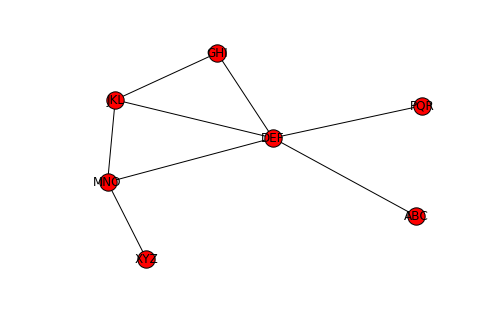

In [33]:
#===============================================
# Plot using the networkx representation of cx
#===============================================
niceCx_full_networkx = niceCx_full.to_networkx()

names = {} 
for n in niceCx_full_networkx.nodes():
    names[n] = n

nx.draw(niceCx_full_networkx, labels = names,with_labels=True)
plt.show()